Score: 0.7762237762237763
  feature  importance
0  pclass    0.092669
1     sex    0.275084
2     age    0.316446
3    fare    0.274990
4   sibsp    0.040810
Выживание пассажира: 1


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


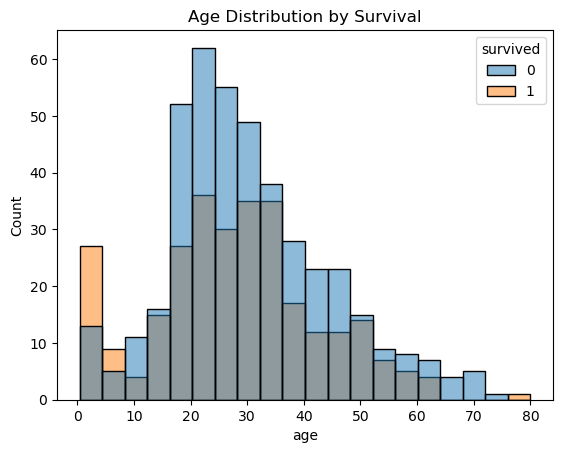

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


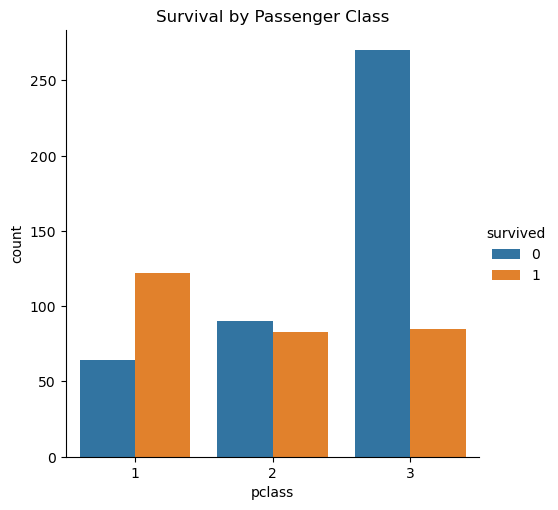

In [2]:
# Анализ Titanic
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
## 1. Загрузка данных
titanic = sns.load_dataset('titanic')
## 2. Предобработка
df = titanic[['survived', 'pclass', 'sex', 'age', 'fare', 'sibsp']].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
X = df[['pclass', 'sex', 'age', 'fare', 'sibsp']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
## 3. Модель
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print(f"Score: {model.score(X_test, y_test)}")
importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
print(importance)
passenger = [[1, 1, 30, 50, 1]]
## 4. Результаты
print(f"Выживание пассажира: {model.predict(passenger)[0]}")
# Гистограмма возраста выживших и невыживших
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='age', hue='survived', bins=20)
plt.title('Age Distribution by Survival')
plt.show()
# Зависимость выживания от класса
sns.catplot(data=df, x='pclass', hue='survived', kind='count')
plt.title('Survival by Passenger Class')
plt.show()